<a href="https://colab.research.google.com/github/gib-hub/python/blob/main/Tugas_Image_Classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [6]:
ls

 3scene/
'Attack on Corona.zip'
 Attack_on_Corona.zip
'BoomMenu.zip (Unzipped Files)'/
'bukti gagal join.png'
 Classroom/
'Colab Notebooks'/
 CONTOH/
 CV.pdf
'Dokumen tanpa judul.gdoc'
 Essay.pdf
'File KSM.png'
'Hasil Praktikum_TT_110_Muhammad Gibran Ramadhan_1101180291 (1).rar'
'Hasil Praktikum_TT_110_Muhammad Gibran Ramadhan_1101180291 (2).rar'
'Hasil Praktikum_TT_110_Muhammad Gibran Ramadhan_1101180291 (3).rar'
'Hasil Praktikum_TT_110_Muhammad Gibran Ramadhan_1101180291 (4).rar'
'Hasil Praktikum_TT_110_Muhammad Gibran Ramadhan_1101180291 (5).rar'
'Hasil Praktikum_TT_110_Muhammad Gibran Ramadhan_1101180291.rar'
'Ipeenk Files'/
'JURNAL_MODUL1_SISKOM-18082_1101180291_MUHAMMAD GIBRAN RAMADHAN.pdf'
'JURNAL_MODUL2_SISKOM-18082_1101180291_MUHAMMAD GIBRAN RAMADHAN.pdf'
'JURNAL_MODUL3_SISKOM-18082_1101180291_MUHAMMAD GIBRAN RAMADHAN.pdf'
 ktm.jpeg
 ktp.jpeg
'LA_GELADI2020_7_1101180291_MUHAMMAD GIBRAN RAMADHAN.pdf'
'LAPORAN HARIAN PESERTA GELADI MINGGU KE-4.pdf'
'LH_GELADI2020_1_1101180291_MU

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [9]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("3scene")
data = []
labels = []

[INFO] loading images...


In [10]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
	image = np.array(image.resize((64, 64))) / 255.0
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [11]:
print(labels)

['highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway'

In [12]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [13]:
print(labels)

[[0 0 1]
 [0 0 1]
 [0 0 1]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [14]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(717, 64, 64, 3)
(240, 64, 64, 3)


In [131]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(64*64*3,)),
        Dense(90, activation="relu", name="layer1"),
        Dense(30, activation="relu", name="layer2"),
        Dense(15, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [132]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 12288)             0         
_________________________________________________________________
layer1 (Dense)               (None, 90)                1106010   
_________________________________________________________________
layer2 (Dense)               (None, 30)                2730      
_________________________________________________________________
layer3 (Dense)               (None, 15)                465       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 48        
Total params: 1,109,253
Trainable params: 1,109,253
Non-trainable params: 0
_________________________________________________________________


In [133]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
23/23 [==============================] - 0s 17ms/step - loss: 1.1709 - accuracy: 0.4686 - val_loss: 0.9315 - val_accuracy: 0.5333
Epoch 2/25
23/23 [==============================] - 0s 10ms/step - loss: 0.8497 - accuracy: 0.6165 - val_loss: 0.7212 - val_accuracy: 0.7000
Epoch 3/25
23/23 [==============================] - 0s 10ms/step - loss: 0.8313 - accuracy: 0.6262 - val_loss: 0.6570 - val_accuracy: 0.7125
Epoch 4/25
23/23 [==============================] - 0s 11ms/step - loss: 0.7784 - accuracy: 0.6513 - val_loss: 0.5690 - val_accuracy: 0.7917
Epoch 5/25
23/23 [==============================] - 0s 11ms/step - loss: 0.6650 - accuracy: 0.7252 - val_loss: 0.6036 - val_accuracy: 0.7500
Epoch 6/25
23/23 [==============================] - 0s 10ms/step - loss: 0.7322 - accuracy: 0.6960 - val_loss: 0.6513 - val_accuracy: 0.7125
Epoch 7/25
23/23 [==============================] - 0s 10ms/step - loss: 0.6216 - accuracy: 0.7559 - val_loss: 0.5554 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


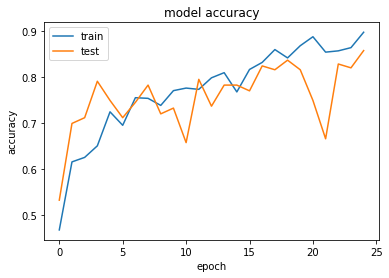

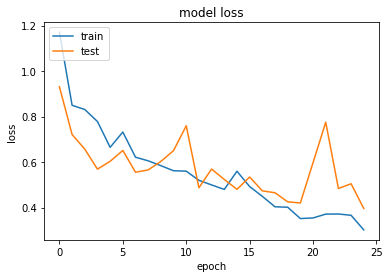

In [134]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [147]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       coast       0.83      0.91      0.87        90
      forest       0.94      0.82      0.88        73
     highway       0.83      0.83      0.83        77

    accuracy                           0.86       240
   macro avg       0.87      0.85      0.86       240
weighted avg       0.86      0.86      0.86       240



In [148]:
model.save('nnmodel_scene')

INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [149]:
import cv2
!pip install cv2_plt_imshow
from cv2_plt_imshow import cv2_plt_imshow
import matplotlib.pyplot as plt
image1='test.jpg'

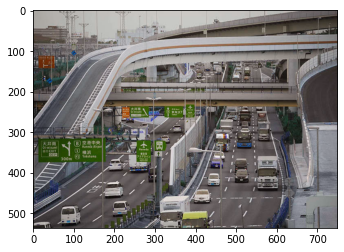

In [150]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [152]:
image_testing = Image.open('test.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [153]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [154]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.762078   0.09020907 0.14771299]]
['coast']
